In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("cause_of_deaths.csv")
df.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


In [3]:
df.shape

(6120, 34)

In [4]:
df.duplicated().sum()

0

No duplicates present

In [5]:
df.isnull().sum().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

In [7]:
df['Country/Territory'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Greenland', 'G

In [8]:
df['Country/Territory'].value_counts()

Afghanistan         30
Papua New Guinea    30
Niue                30
North Korea         30
North Macedonia     30
                    ..
Greenland           30
Grenada             30
Guam                30
Guatemala           30
Zimbabwe            30
Name: Country/Territory, Length: 204, dtype: int64

In [36]:
df['Year'].value_counts().sort_values(ascending=False)

1990    204
1991    204
1992    204
1993    204
1994    204
1995    204
1996    204
1997    204
1998    204
1999    204
2000    204
2001    204
2002    204
2003    204
2004    204
2005    204
2006    204
2007    204
2008    204
2009    204
2010    204
2011    204
2012    204
2013    204
2014    204
2015    204
2016    204
2017    204
2018    204
2019    204
Name: Year, dtype: int64

Data of 30 years from 1990 to 2019 of 204 different countries is present in the dataset

In [10]:
df.columns.values

array(['Country/Territory', 'Code', 'Year', 'Meningitis',
       "Alzheimer's Disease and Other Dementias", "Parkinson's Disease",
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm',
       'Exposure to Forces of Nature', 'Diarrheal Diseases',
       'Environmental Heat and Cold Exposure', 'Neoplasms',
       'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings',
       'Protein-Energy Malnutrition', 'Road Injuries',
       'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis'], dtype=object)

In [11]:
#all diseases
diseases=list(df.columns.values[3:])
diseases

['Meningitis',
 "Alzheimer's Disease and Other Dementias",
 "Parkinson's Disease",
 'Nutritional Deficiencies',
 'Malaria',
 'Drowning',
 'Interpersonal Violence',
 'Maternal Disorders',
 'HIV/AIDS',
 'Drug Use Disorders',
 'Tuberculosis',
 'Cardiovascular Diseases',
 'Lower Respiratory Infections',
 'Neonatal Disorders',
 'Alcohol Use Disorders',
 'Self-harm',
 'Exposure to Forces of Nature',
 'Diarrheal Diseases',
 'Environmental Heat and Cold Exposure',
 'Neoplasms',
 'Conflict and Terrorism',
 'Diabetes Mellitus',
 'Chronic Kidney Disease',
 'Poisonings',
 'Protein-Energy Malnutrition',
 'Road Injuries',
 'Chronic Respiratory Diseases',
 'Cirrhosis and Other Chronic Liver Diseases',
 'Digestive Diseases',
 'Fire, Heat, and Hot Substances',
 'Acute Hepatitis']

In [12]:
df

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,...,3176,2108,381,2990,2373,2751,1956,4202,632,146
6116,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,...,3259,2160,393,3027,2436,2788,1962,4264,648,146
6117,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,...,3313,2196,398,2962,2473,2818,2007,4342,654,144
6118,Zimbabwe,ZWE,2018,1450,795,227,2918,2088,825,1396,...,3381,2240,400,2890,2509,2849,2030,4377,657,139


In [13]:
df['deaths']=df[diseases].sum(axis=1)
df

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,deaths
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,3709,338,2054,4154,5945,2673,5005,323,2985,147971
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,3724,351,2119,4472,6050,2728,5120,332,3092,156844
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,3776,386,2404,5106,6223,2830,5335,360,3325,169156
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,3862,425,2797,5681,6445,2943,5568,396,3601,182230
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,3932,451,3038,6001,6664,3027,5739,420,3816,194795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,...,2108,381,2990,2373,2751,1956,4202,632,146,130080
6116,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,...,2160,393,3027,2436,2788,1962,4264,648,146,128274
6117,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,...,2196,398,2962,2473,2818,2007,4342,654,144,126515
6118,Zimbabwe,ZWE,2018,1450,795,227,2918,2088,825,1396,...,2240,400,2890,2509,2849,2030,4377,657,139,123506


In [14]:
#data of top 20 deaths
df.sort_values(by='deaths', ascending=False)[:20][["Country/Territory","Year","deaths"]]

,Country/Territory,Year,deaths
1139,China,2019,10442561
1138,China,2018,10163943
1137,China,2017,9978653
1119,China,2016,9814213
1118,China,2015,9591222
1117,China,2014,9503904
1116,China,2013,9411928
1114,China,2011,9366974
1115,China,2012,9364587
1113,China,2010,9284664


Here top20 total deaths in all these years are from China and few times from India. the reason can be that these two countries are top 2 in terms of population.

In [15]:
'''c= df[df["Country/Territory"]=="China"].sort_values(by="deaths", ascending=False)
plt.figure()
sns.scatterplot(c.Year, c.deaths)
plt.xlabel("Year", size=12)
plt.ylabel("Death in Millions",  size=12)
plt.title("China (Year vs Deaths)")'''

'c= df[df["Country/Territory"]=="China"].sort_values(by="deaths", ascending=False)\nplt.figure()\nsns.scatterplot(c.Year, c.deaths)\nplt.xlabel("Year", size=12)\nplt.ylabel("Death in Millions",  size=12)\nplt.title("China (Year vs Deaths)")'

In [16]:
#countries samples
con=df["Country/Territory"].sample(10, random_state=300)
con

3544       Montenegro
5183            Sudan
1388           Cyprus
5820    United States
2150          Grenada
2163             Guam
5650     Turkmenistan
420        Bangladesh
9         Afghanistan
2035          Germany
Name: Country/Territory, dtype: object

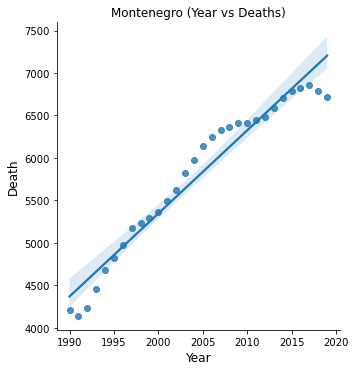

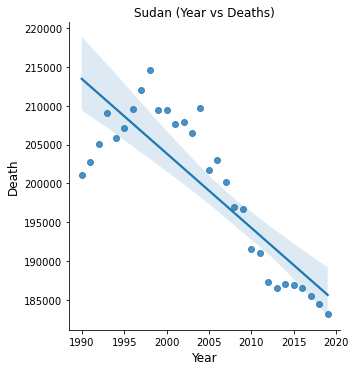

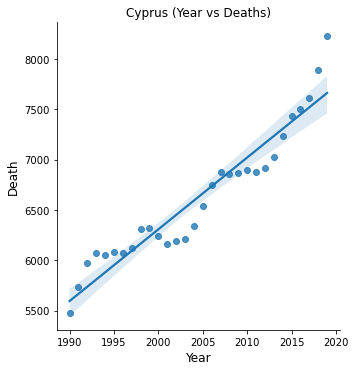

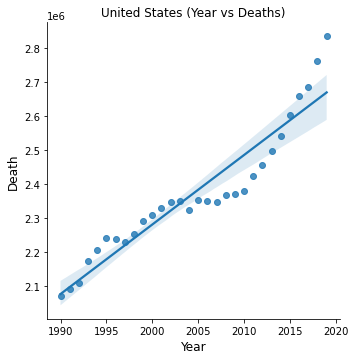

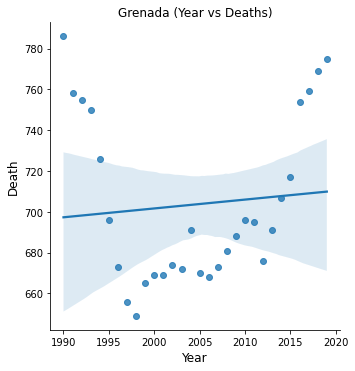

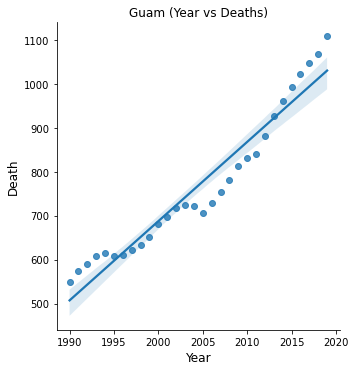

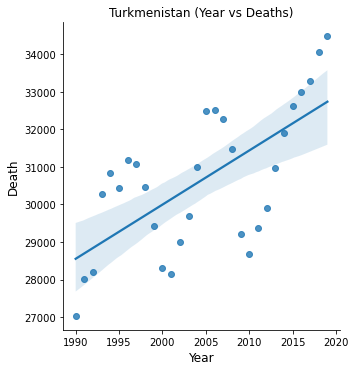

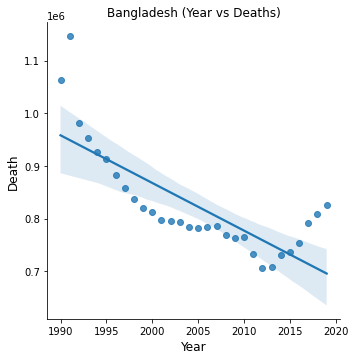

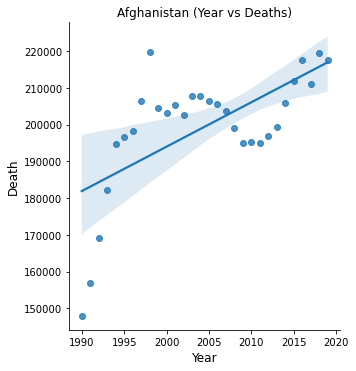

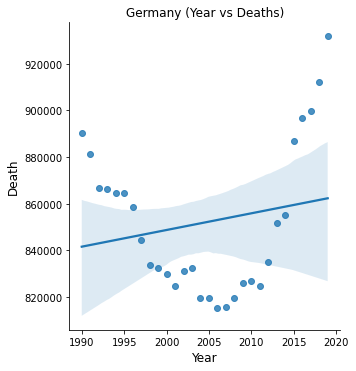

In [17]:
# plot the sample countries deaths in all these years to get the rough idea about the trend.
for i in con:
    c= df[df["Country/Territory"]==i].sort_values(by="deaths", ascending=False)
    #plt.figure(figsize=(20,15))
    sns.lmplot('Year', 'deaths', data= c)
    plt.xlabel("Year", size=12)
    plt.ylabel("Death",  size=12)
    plt.title(i+" (Year vs Deaths)")

Here we can see that deaths with each passing year is increasing in most of the sample of countries while few have declining deaths.

In [18]:
# top countries with highest deaths disease wise
for i in diseases:
    x=df.groupby(["Country/Territory"])[i].sum().sort_values(ascending=False)
    print(x[:5],"\n")

Country/Territory
India       2008944
Nigeria     1520376
Pakistan     752870
Ethiopia     605256
China        480899
Name: Meningitis, dtype: int64 

Country/Territory
China            5381846
United States    3302609
Japan            2638908
India            1707561
Germany          1114977
Name: Alzheimer's Disease and Other Dementias, dtype: int64 

Country/Territory
China            1533092
India             756832
United States     661288
Japan             308327
Germany           264727
Name: Parkinson's Disease, dtype: int64 

Country/Territory
India          3290569
Ethiopia        823168
Bangladesh      702268
North Korea     632056
Indonesia       604467
Name: Nutritional Deficiencies, dtype: int64 

Country/Territory
Nigeria                         6422063
Democratic Republic of Congo    2557219
India                           2439244
Uganda                          1265629
Burkina Faso                     950762
Name: Malaria, dtype: int64 

Country/Territory
China        

*China and India can be seen at the top in almost every Disease causing deaths due to the population they have.

*China is at top for the death due to Parkinson's Disease with almost double the death count compared to India at second.

*In terms of deaths due to Nutritional Deficiencies, India is at top with almost 4 times death compared to Ethiopia which is at number 2.

*Also India leaves other countries far behind in term of the deaths due to self-harm or Suicide.

*India tops the chart with huge margins interms of deaths due to any respiratory disorders.

*China and India are the top2 interms of Deaths due to road injuries.

In [19]:
# top countries with lowest deaths disease wise
for i in diseases:
    x=df.groupby(["Country/Territory"])[i].sum().sort_values(ascending=False)[-5:]
    print(x,"\n")

Country/Territory
San Marino                  0
Niue                        0
Northern Mariana Islands    0
Cook Islands                0
Palau                       0
Name: Meningitis, dtype: int64 

Country/Territory
Palau      45
Tuvalu     35
Niue       12
Nauru       0
Tokelau     0
Name: Alzheimer's Disease and Other Dementias, dtype: int64 

Country/Territory
Palau      30
Tuvalu     30
Niue        0
Tokelau     0
Nauru       0
Name: Parkinson's Disease, dtype: int64 

Country/Territory
Andorra         0
Palau           0
Cook Islands    0
San Marino      0
Monaco          0
Name: Nutritional Deficiencies, dtype: int64 

Country/Territory
Luxembourg    0
Albania       0
Libya         0
Lesotho       0
Lithuania     0
Name: Malaria, dtype: int64 

Country/Territory
Cook Islands    30
San Marino       0
Tokelau          0
Andorra          0
Niue             0
Name: Drowning, dtype: int64 

Country/Territory
Monaco          0
Niue            0
Cook Islands    0
Tokelau         0
Sa

Here countries ranking at the bottom are the small countries with small population. 

Hence, we can conclude that the Population plays an important role here which is also obvious.


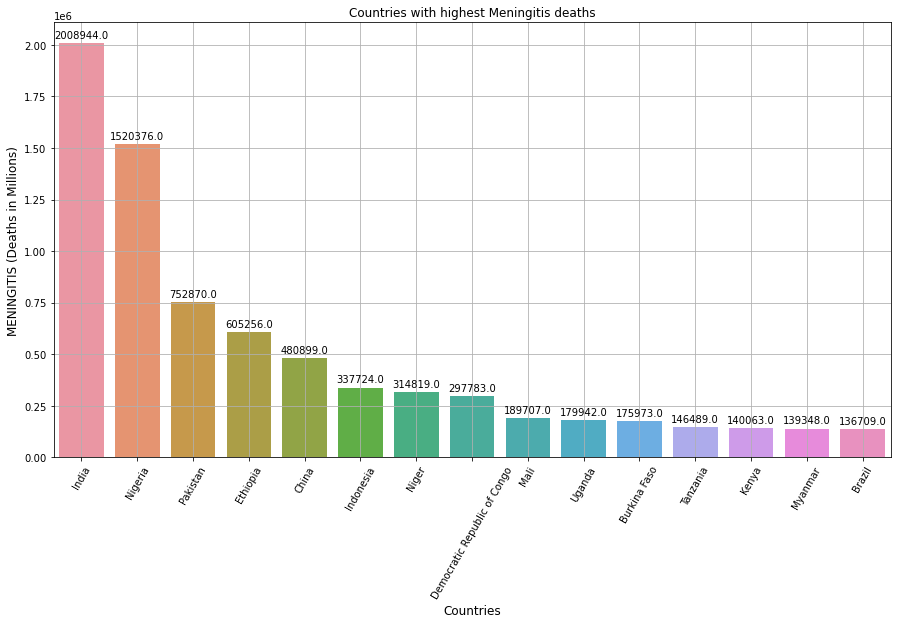

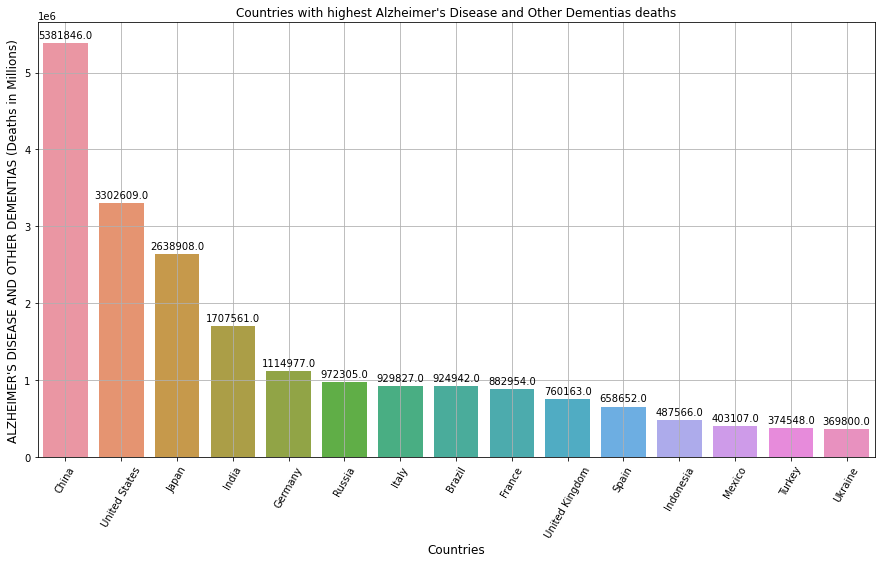

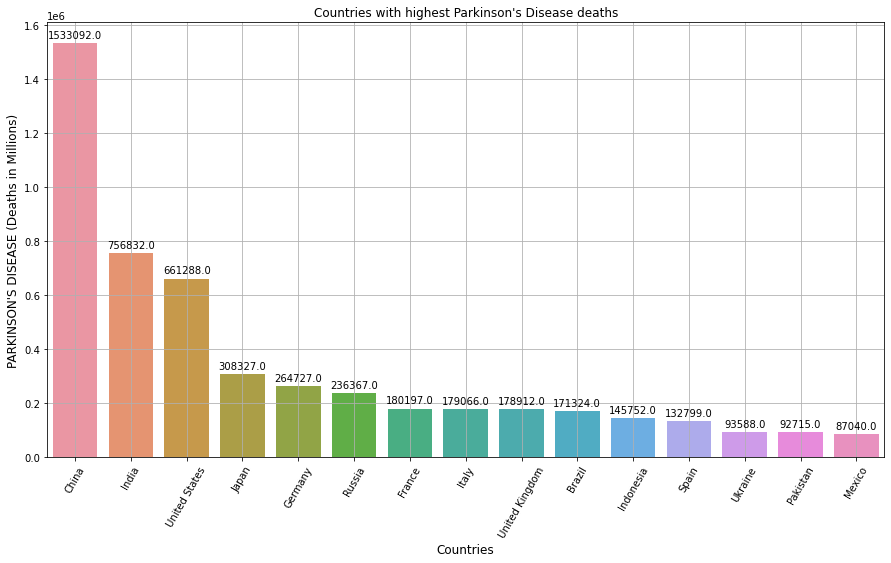

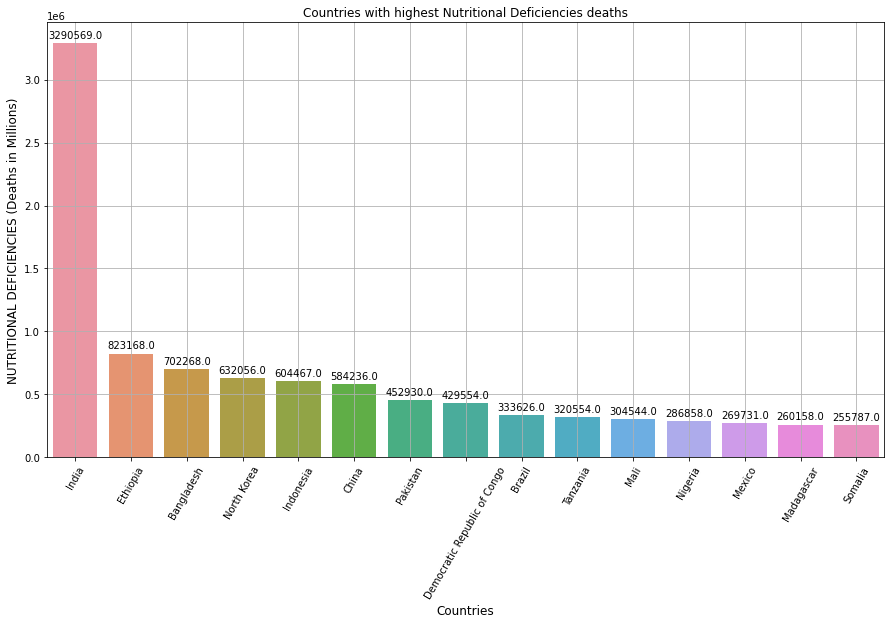

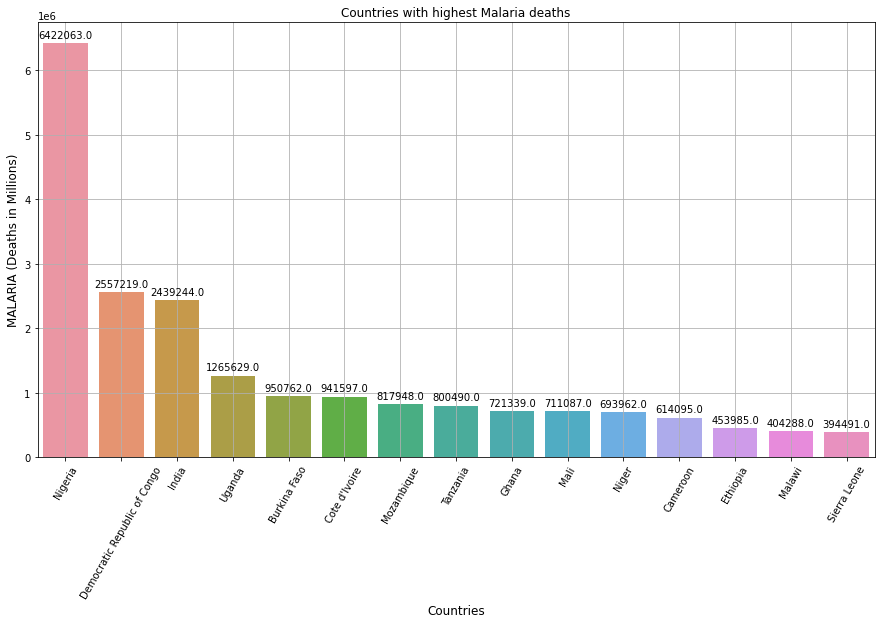

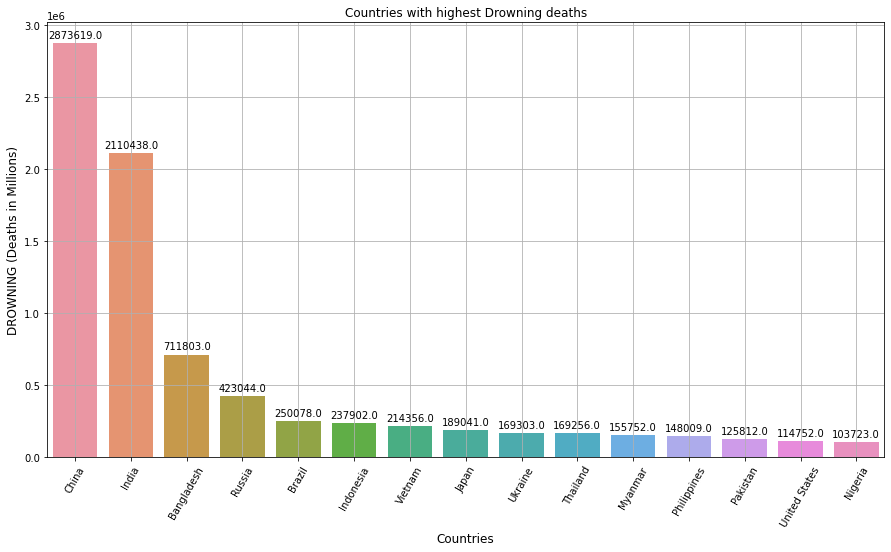

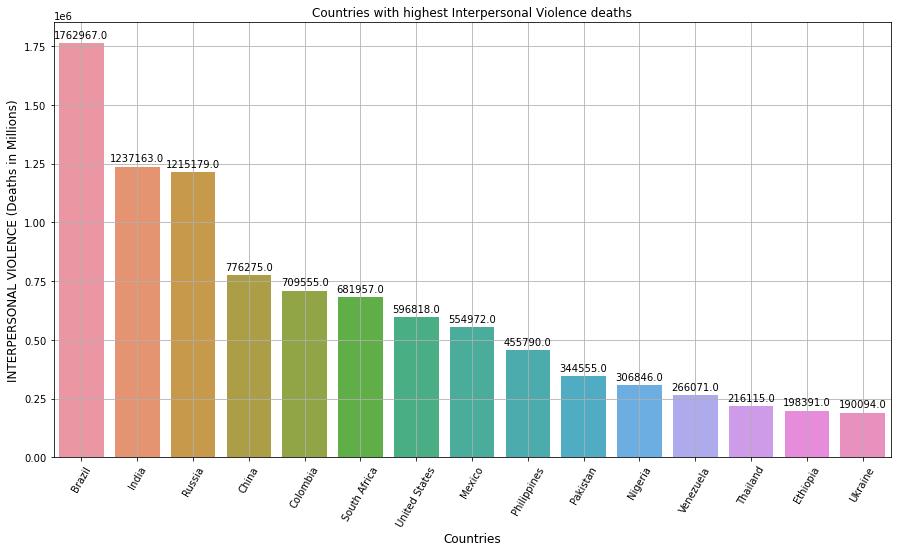

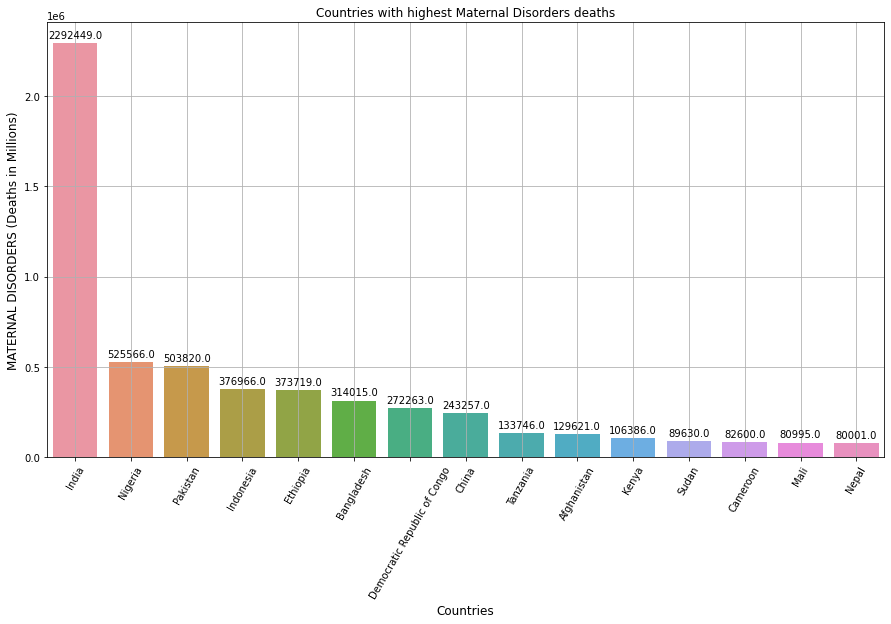

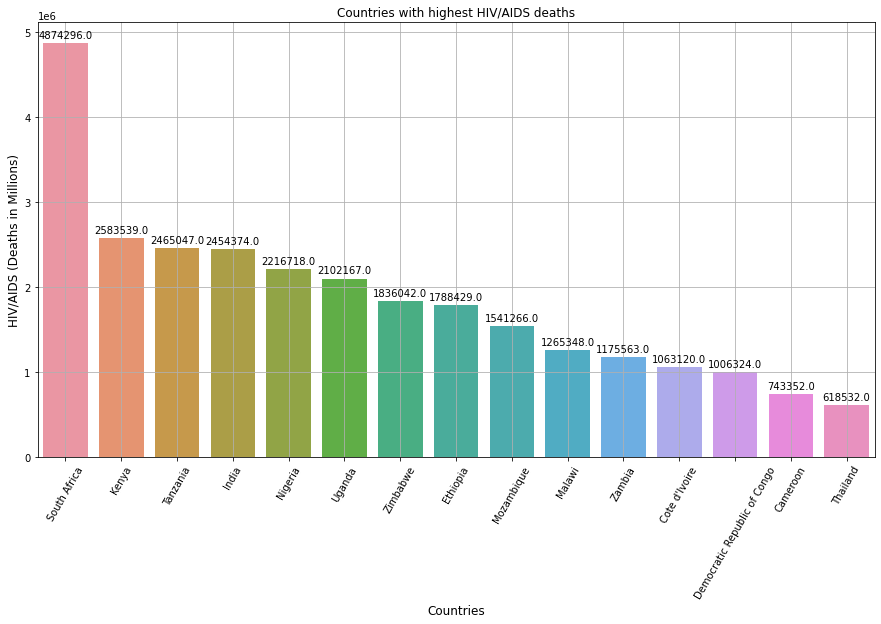

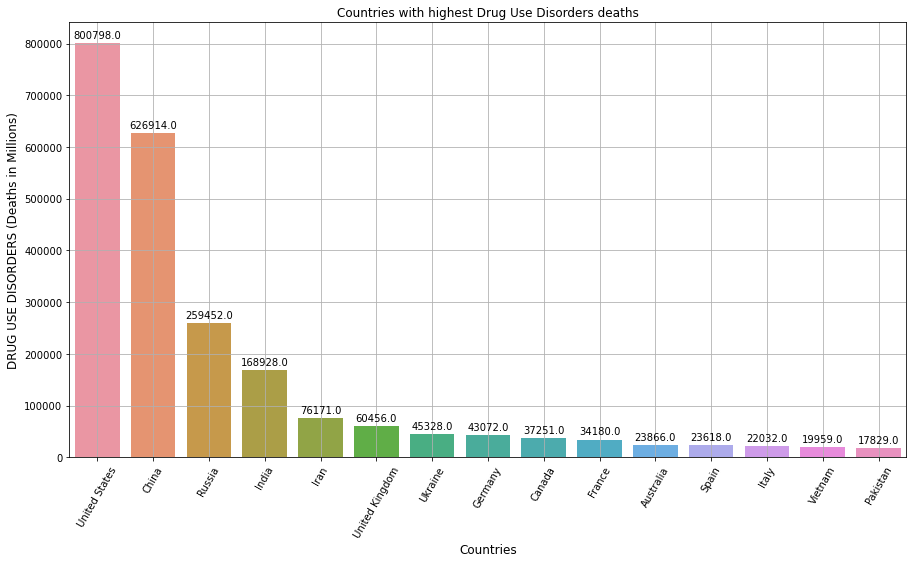

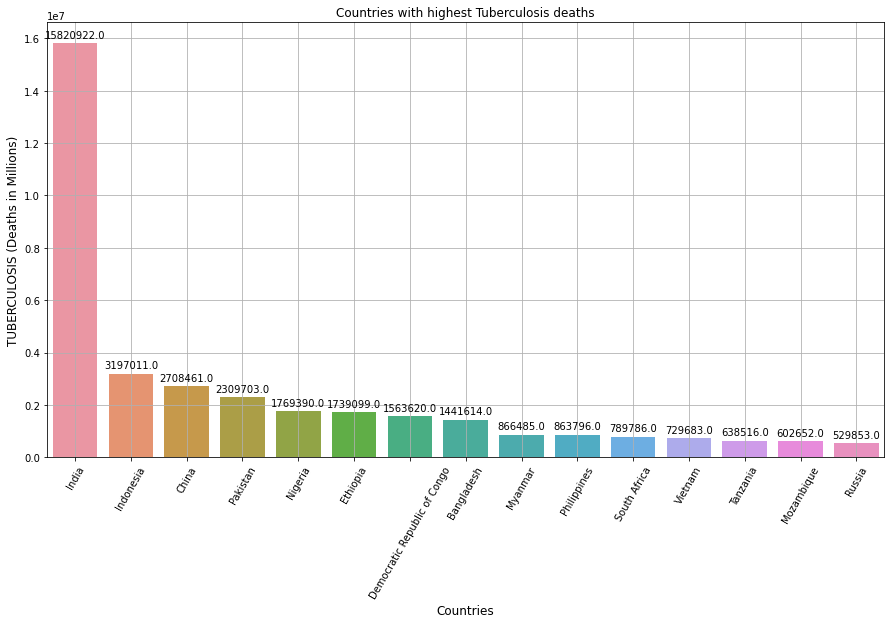

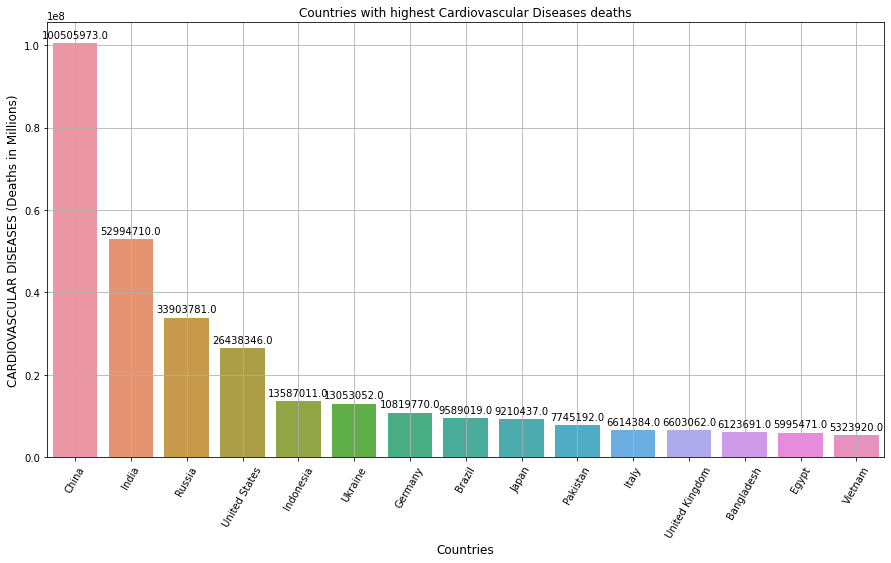

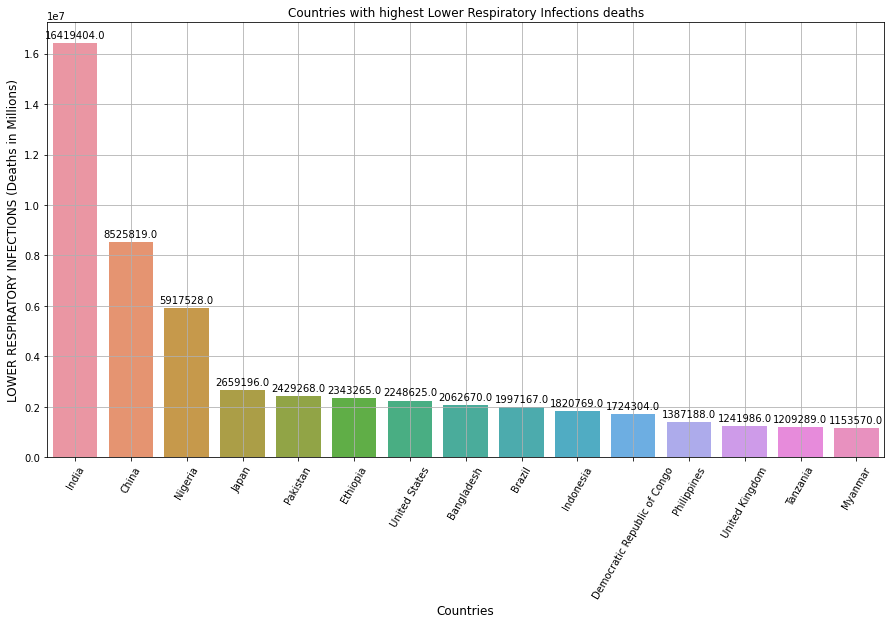

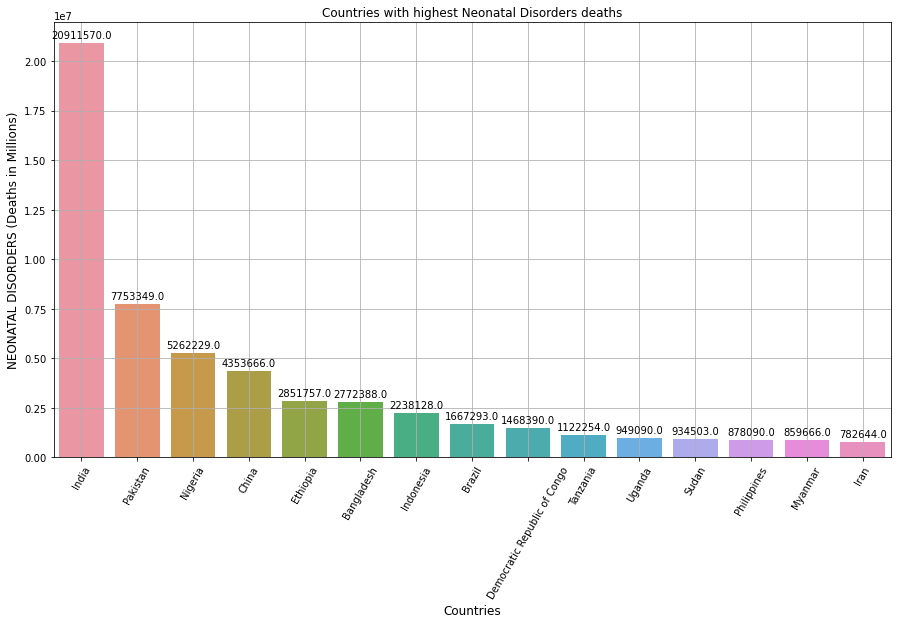

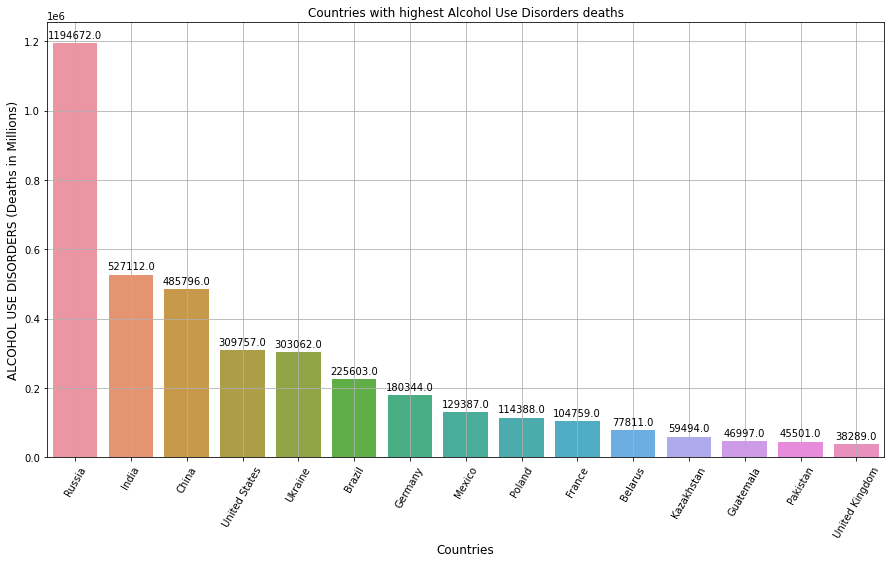

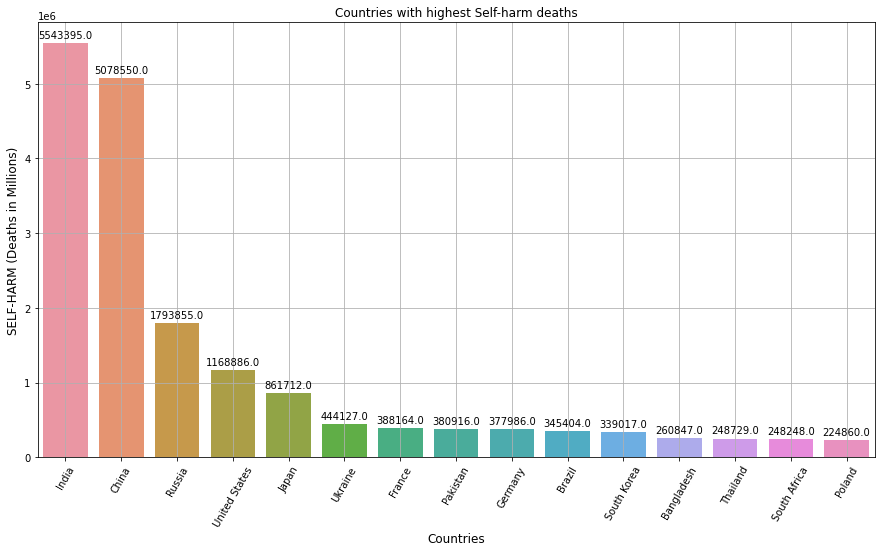

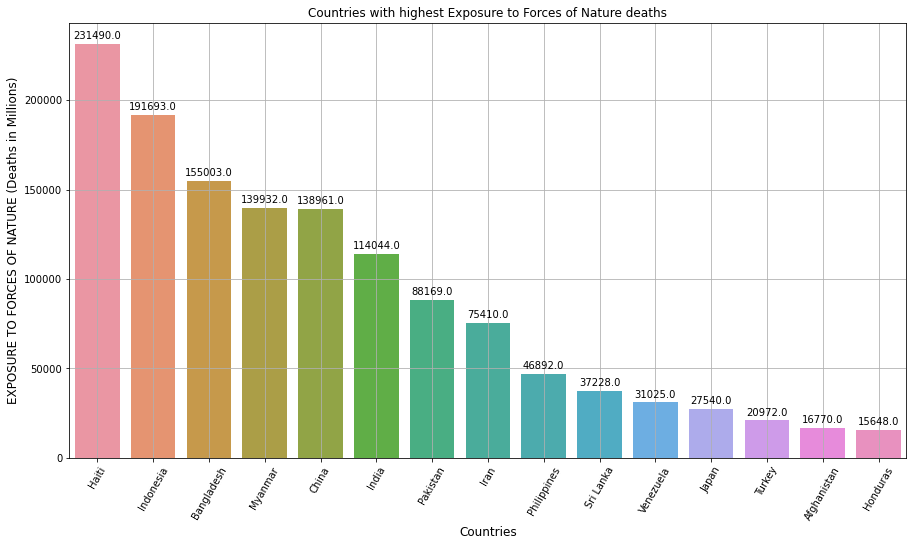

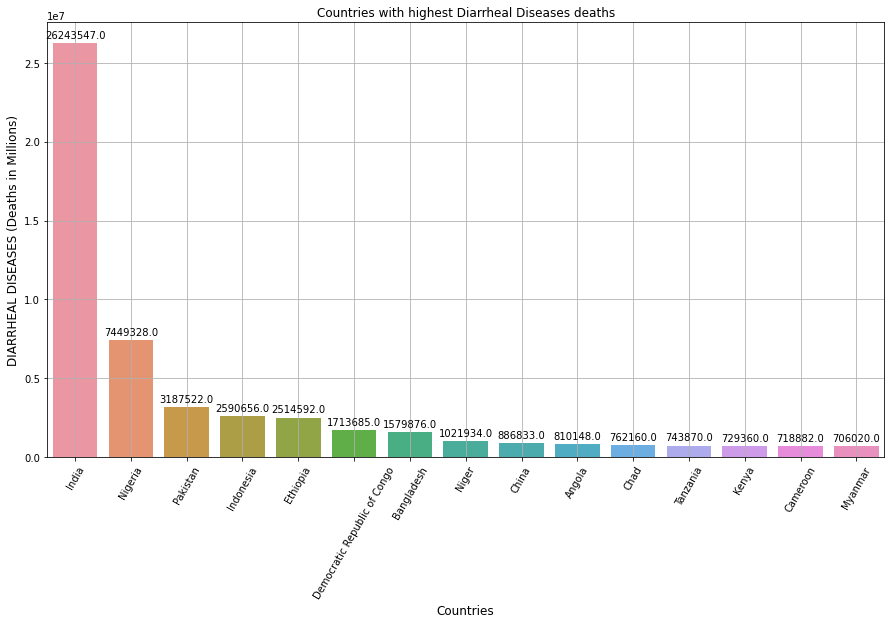

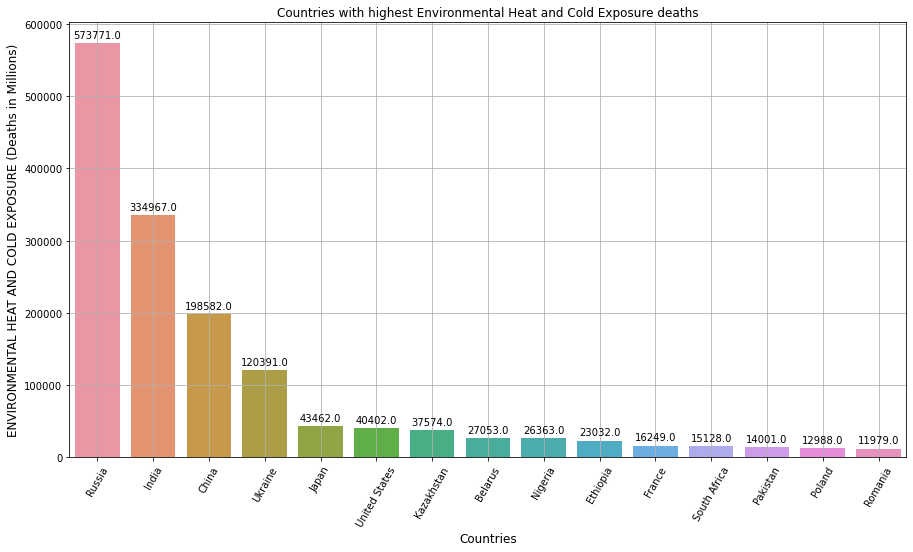

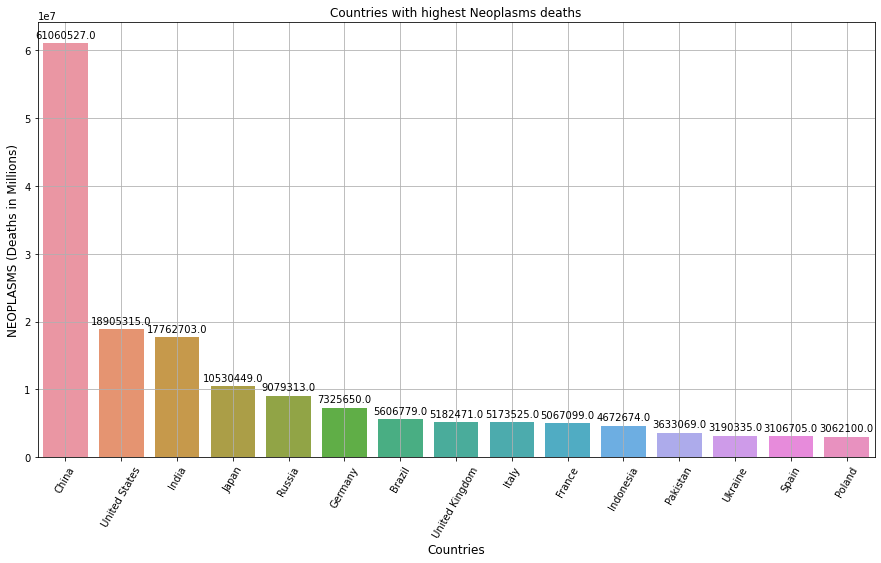

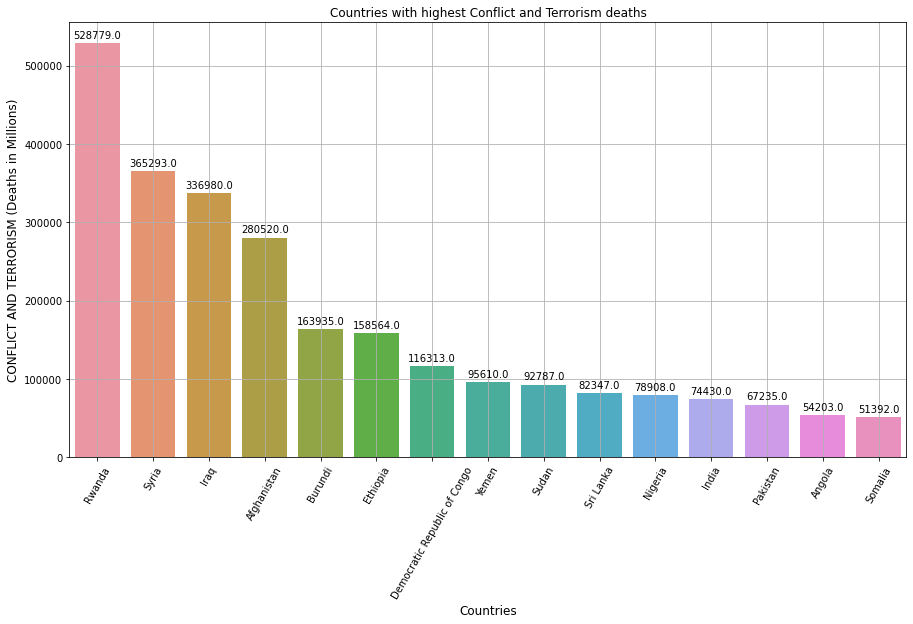

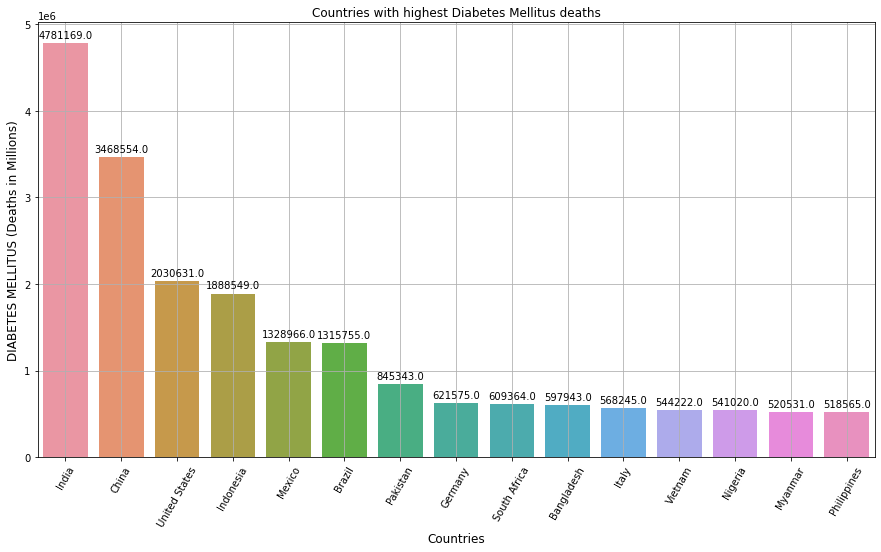

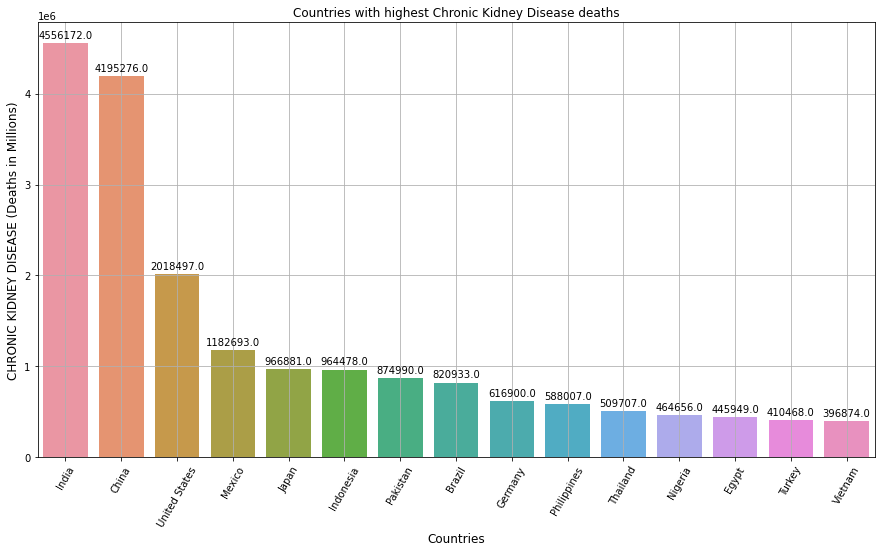

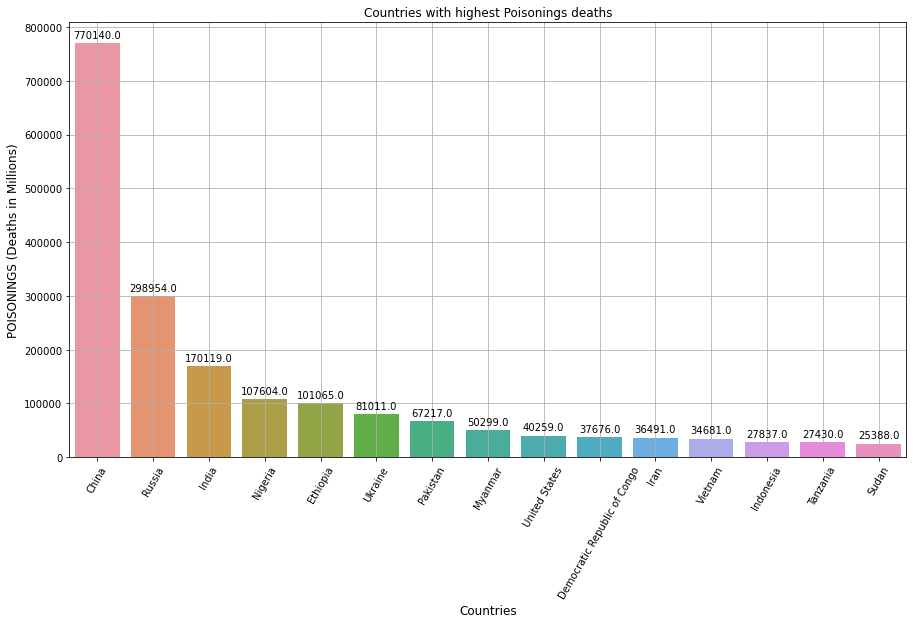

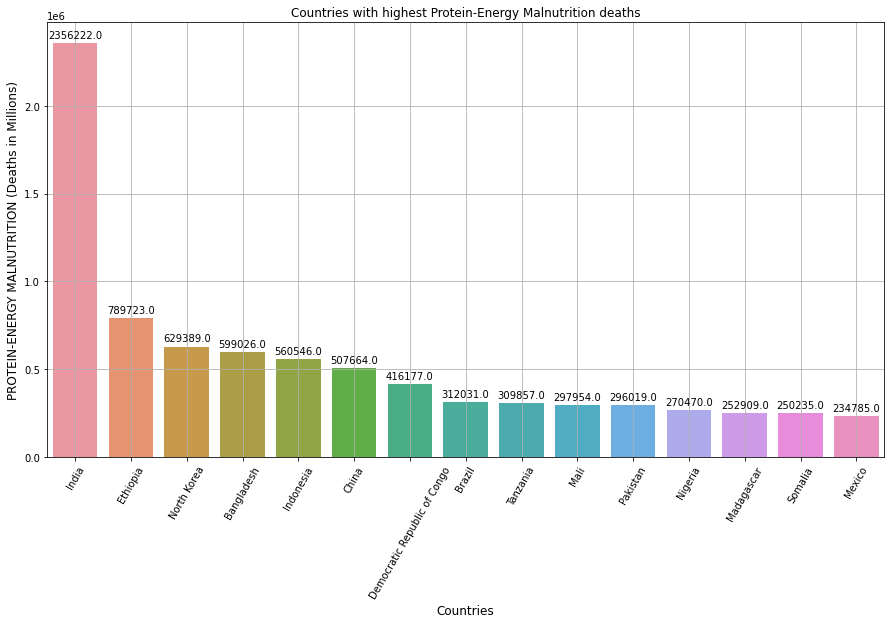

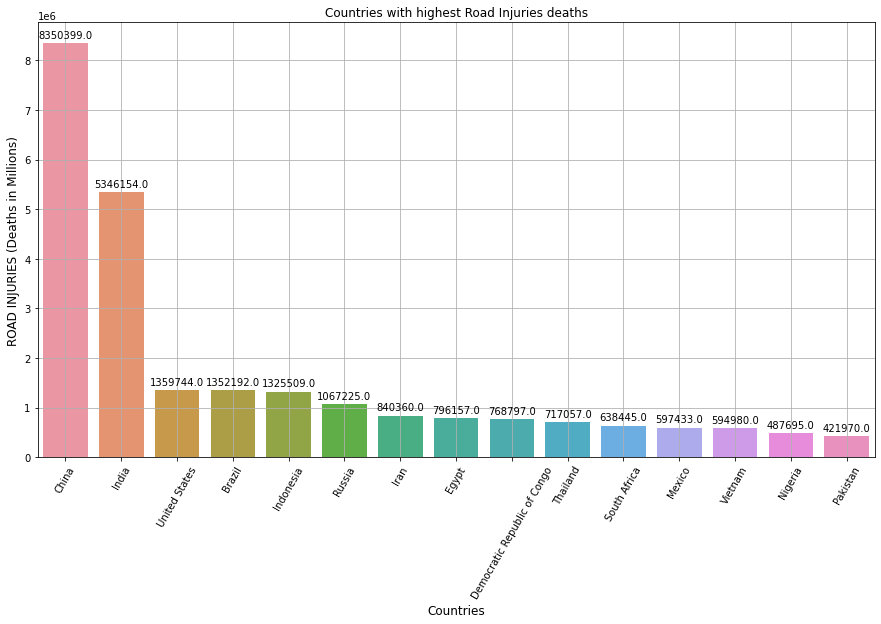

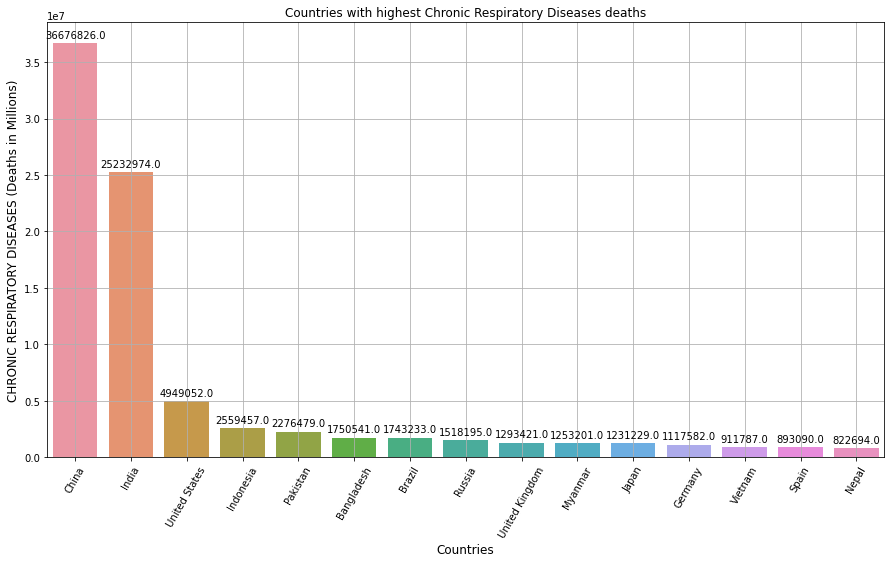

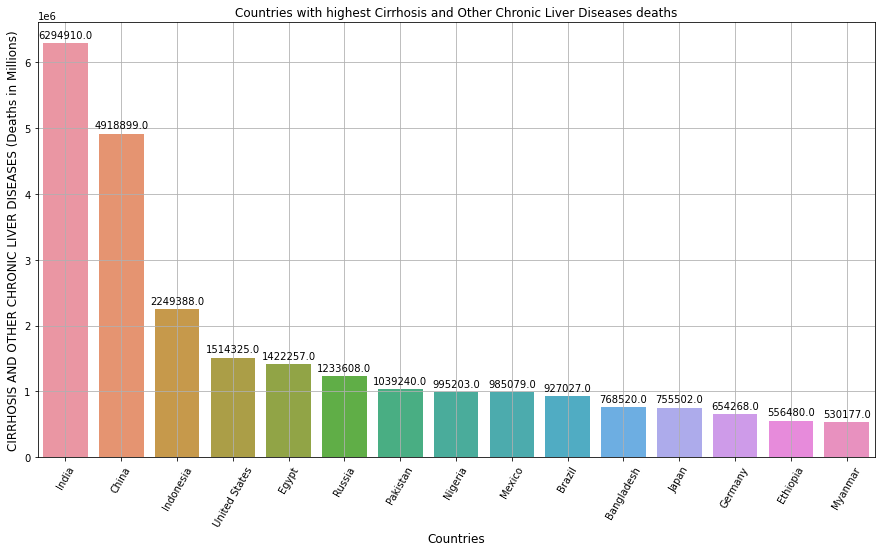

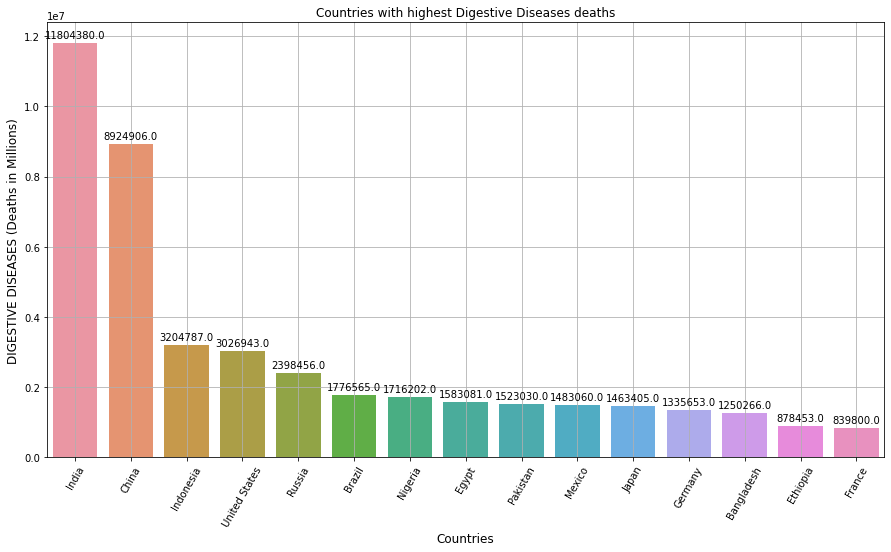

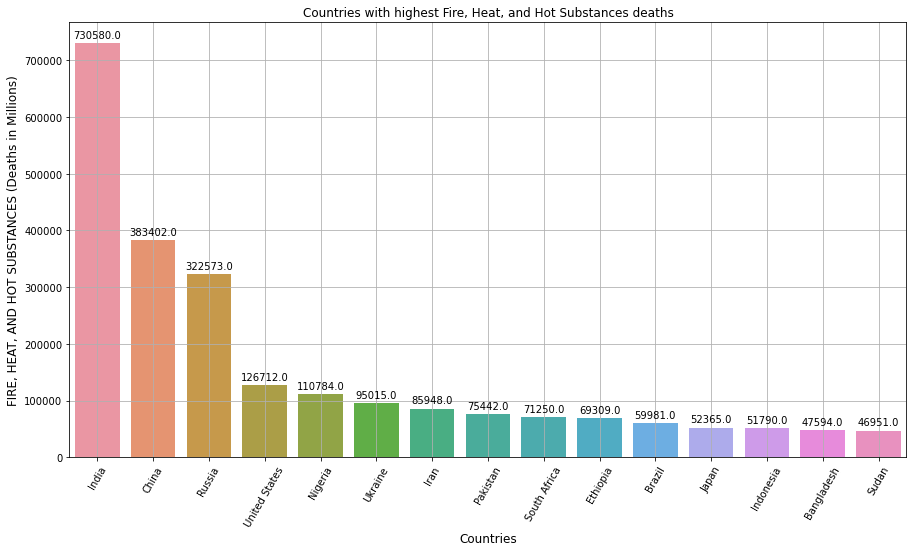

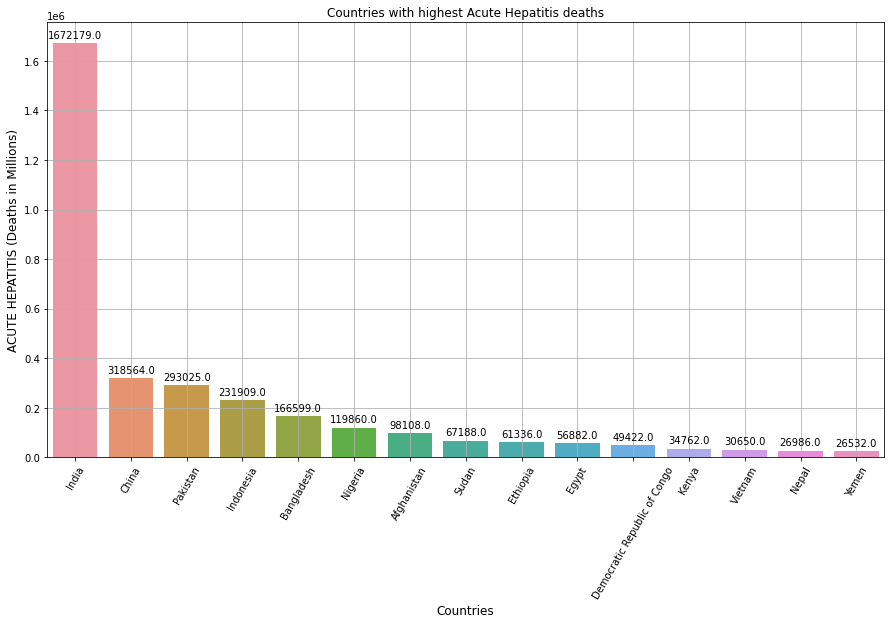

In [20]:
#visualising the data of top 15 countries with highest deaths disease wise
for i in diseases:
    m=df.groupby(["Country/Territory"])[i].sum().sort_values(ascending=False)[:15]
    plt.subplots(figsize=(15,8))
    ax=sns.barplot(x=m.index, y= m.values)

    #for a in ax.containers:
        #container= ax.containers[0]
        #ax.bar_label(container, labels=[i for i in container.datavalues])
        #ax.bar_label(a)
    ax.bar_label(ax.containers[0],ax.containers[0].datavalues, padding=3)
    
    plt.xticks(rotation=60)
    plt.xlabel("Countries", size=12)
    plt.ylabel(i.upper()+" (Deaths in Millions)", size=12)
    plt.grid()
    plt.title("Countries with highest "+i+" deaths")
    
    

In [21]:
df.columns

Index(['Country/Territory', 'Code', 'Year', 'Meningitis',
       'Alzheimer's Disease and Other Dementias', 'Parkinson's Disease',
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis', 'deaths'],
      dtype='object')

In [22]:
# 10 countries with highest death in these 30 years
top= df.groupby(["Country/Territory"])['deaths'].sum().sort_values(ascending= False)[:10]
top

Country/Territory
China            265408106
India            238158165
United States     71197802
Russia            59591155
Indonesia         44046941
Nigeria           43670014
Pakistan          38151878
Brazil            32674112
Japan             31922807
Germany           25559667
Name: deaths, dtype: int64

In [23]:
# percentage of data contributed by these top10 countries
per=[]
for i in range (len(top)):
    per.append("%.2f"%((top[i]/df["deaths"].sum())*100)+"%")

In [24]:
'''# percentage of data contributed by these top10 countries
print("Country/Territory", end="\t")
print("Total Deaths ", end="\t\t")
print("Percentage of deaths")
print()
for i in range (len(top)):
    if top.index[i]=="United States" or top.index[i]=="Indonesia" or top.index[i]=="Pakistan":
        print(top.index[i], end="\t\t")
    else:
        print(top.index[i], end="\t\t\t")
    
    print(top[i], end="\t\t")
    print("%.2f"%((top[i]/df["deaths"].sum())*100)+"%")'''

'# percentage of data contributed by these top10 countries\nprint("Country/Territory", end="\t")\nprint("Total Deaths ", end="\t\t")\nprint("Percentage of deaths")\nprint()\nfor i in range (len(top)):\n    if top.index[i]=="United States" or top.index[i]=="Indonesia" or top.index[i]=="Pakistan":\n        print(top.index[i], end="\t\t")\n    else:\n        print(top.index[i], end="\t\t\t")\n    \n    print(top[i], end="\t\t")\n    print("%.2f"%((top[i]/df["deaths"].sum())*100)+"%")'

In [25]:
pd.DataFrame({"Country": top.index, "Total Deaths": top, "Percentage": per}).set_index("Country")

,Total Deaths,Percentage
Country,,
China,265408106,18.08%
India,238158165,16.22%
United States,71197802,4.85%
Russia,59591155,4.06%
Indonesia,44046941,3.00%
Nigeria,43670014,2.97%
Pakistan,38151878,2.60%
Brazil,32674112,2.23%
Japan,31922807,2.17%


Here we can see that top2 countries i.e. China and India contribute 34.30% of our data which is nearly 1/3rd. hence let's understand them in detail.

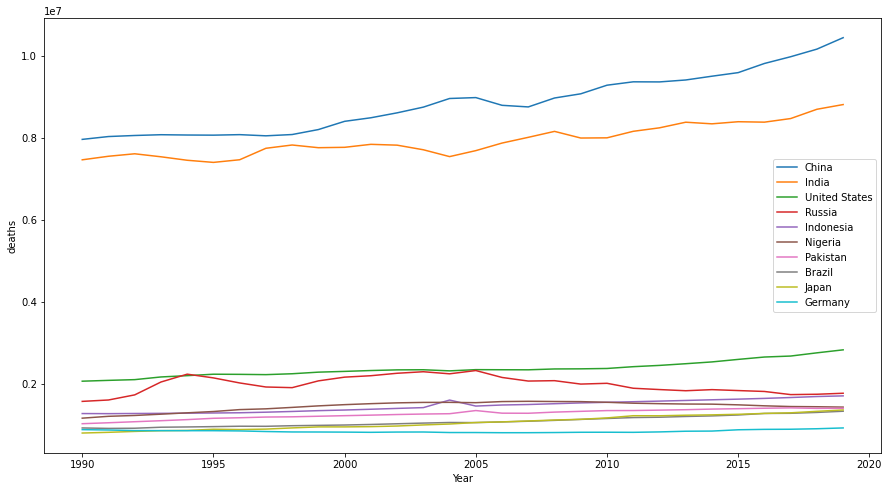

In [26]:
plt.figure(figsize=(15,8))
for i in top.index:
    a=df[df["Country/Territory"]==i]
    sns.lineplot(data= a, x='Year', y='deaths',label=i)

In [27]:
chin= df[df["Country/Territory"]=='China']
ind= df[df["Country/Territory"]=='India']

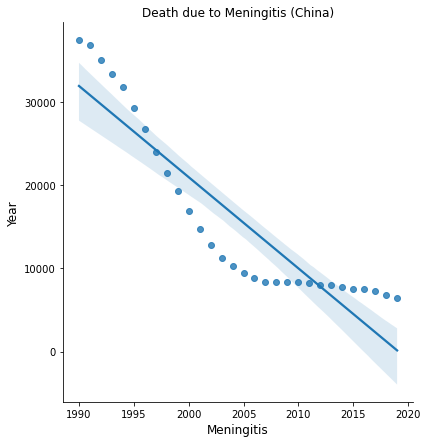

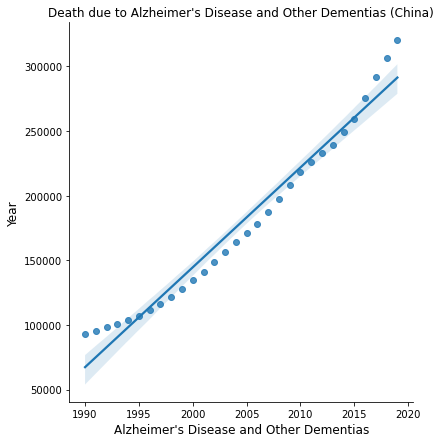

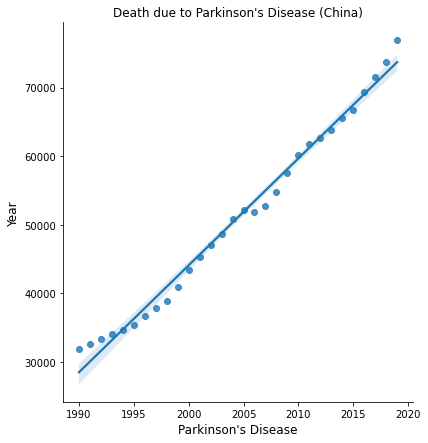

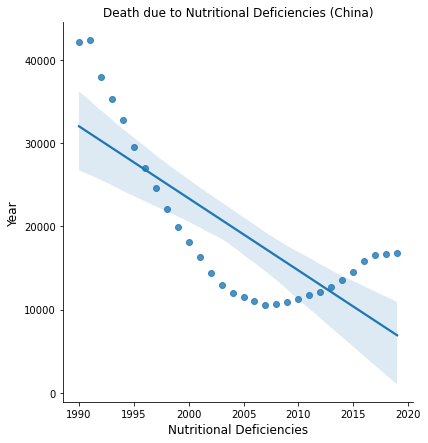

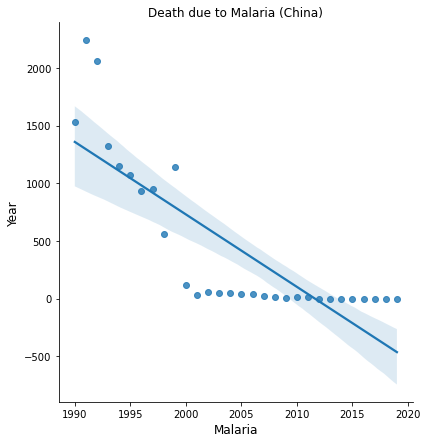

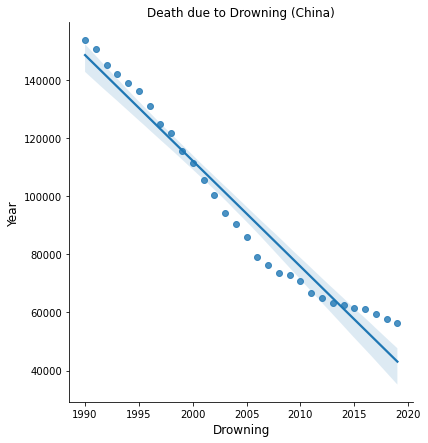

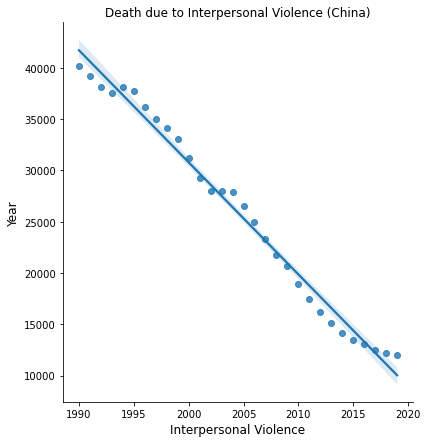

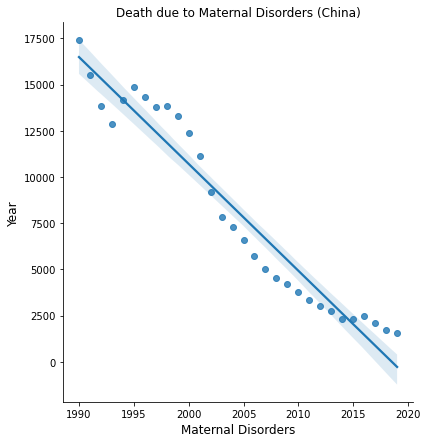

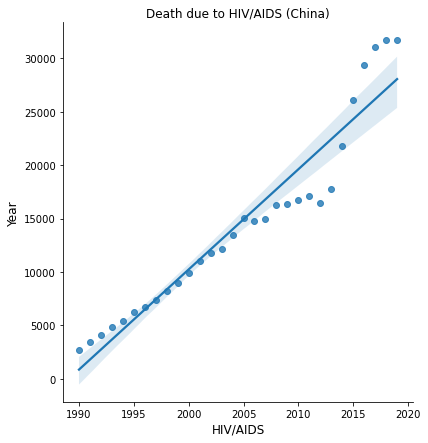

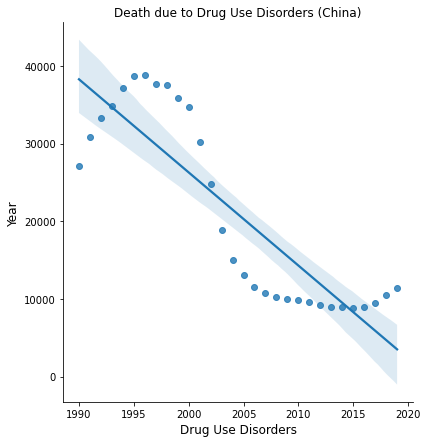

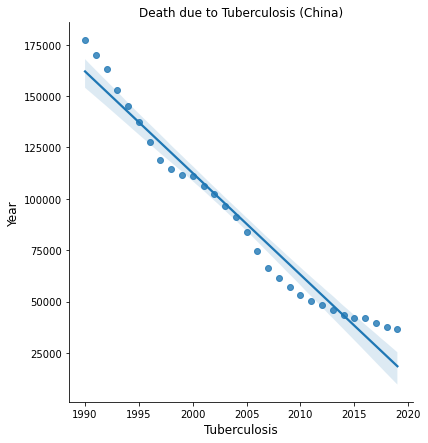

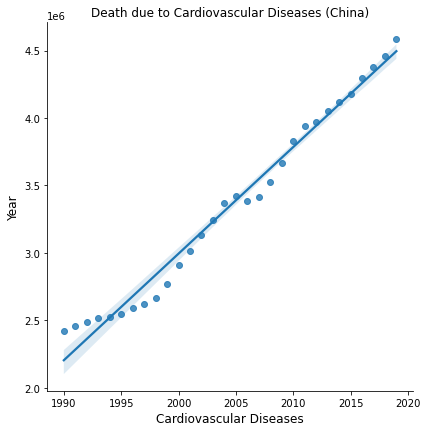

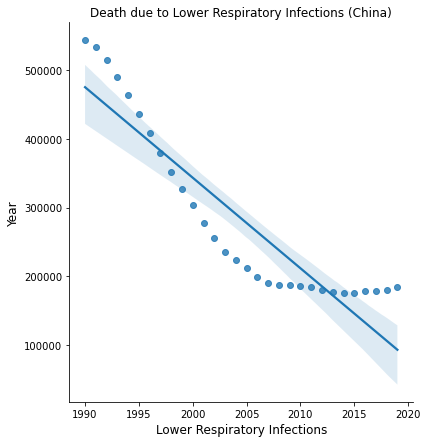

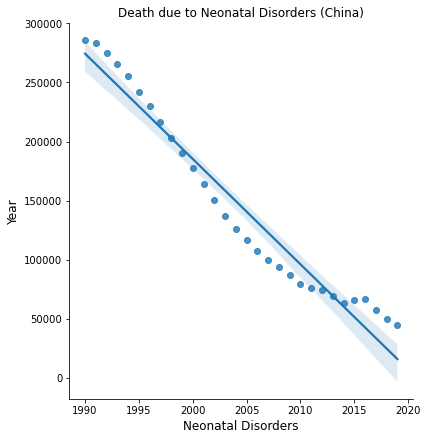

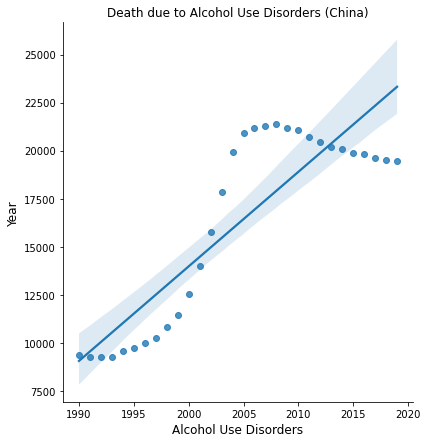

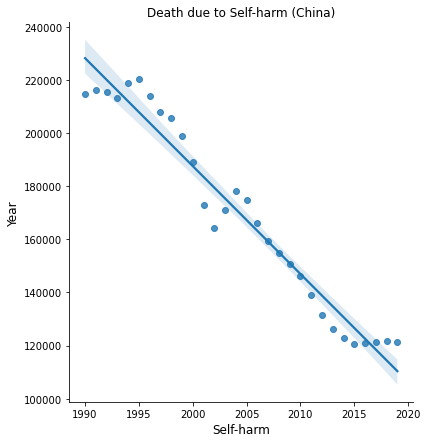

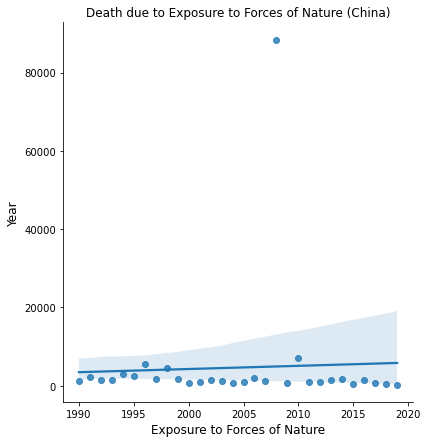

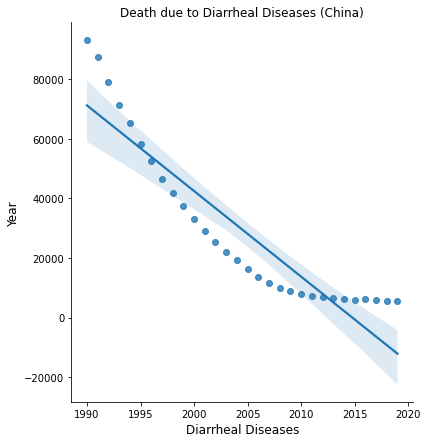

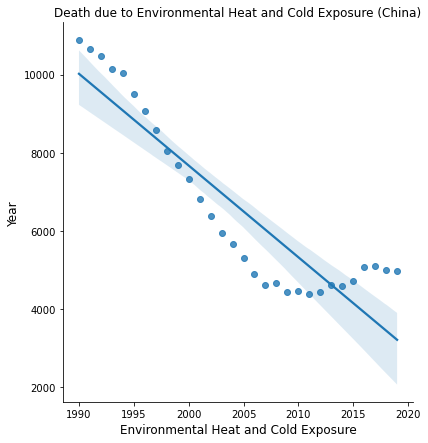

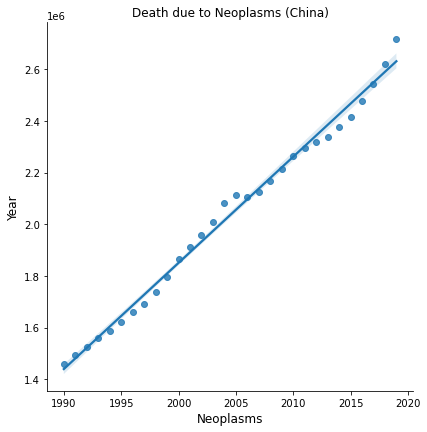

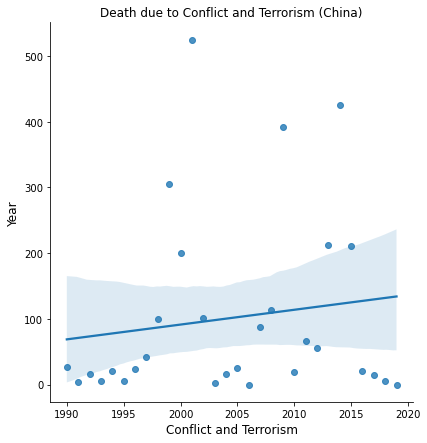

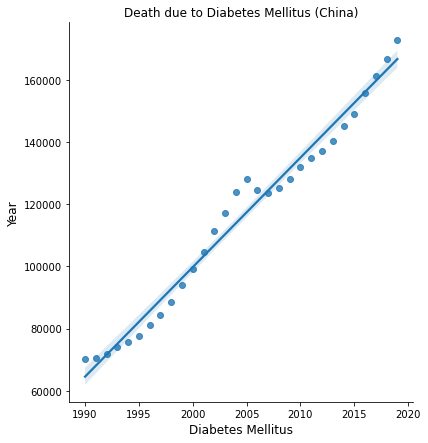

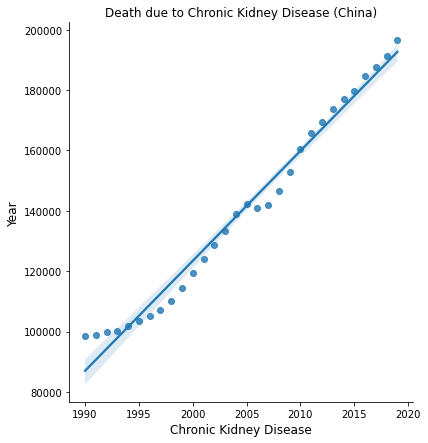

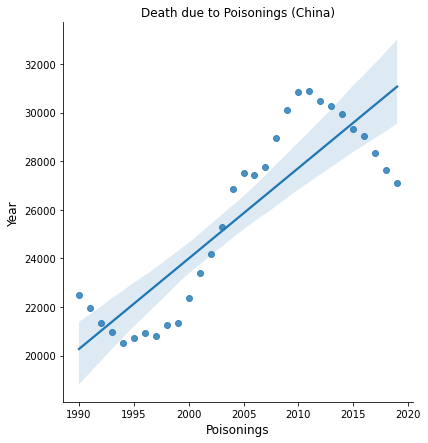

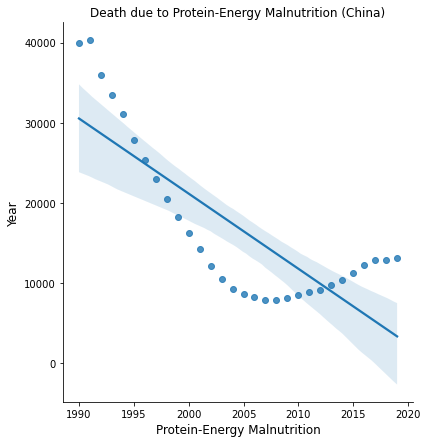

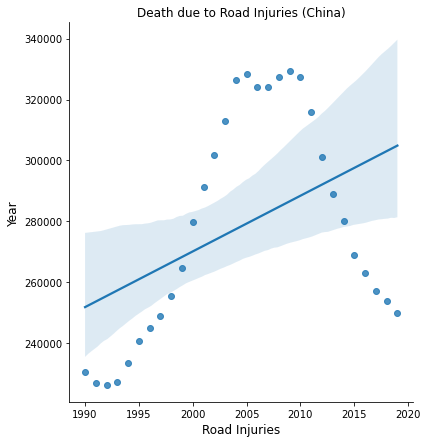

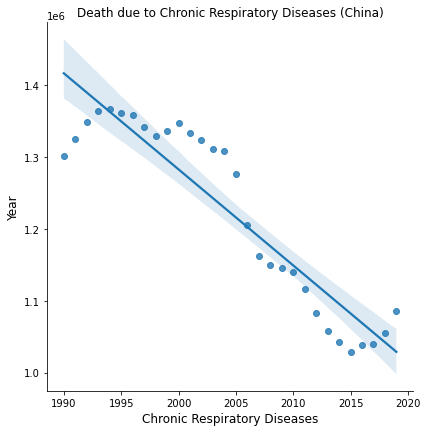

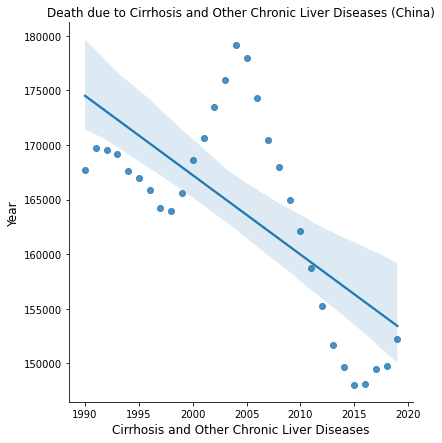

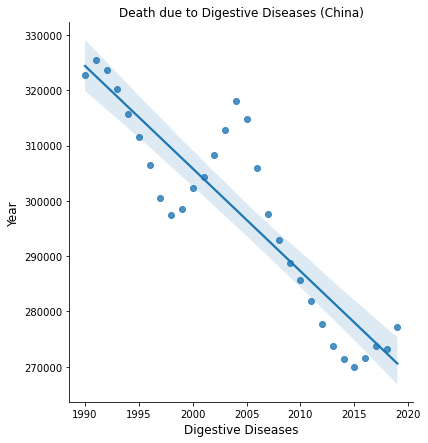

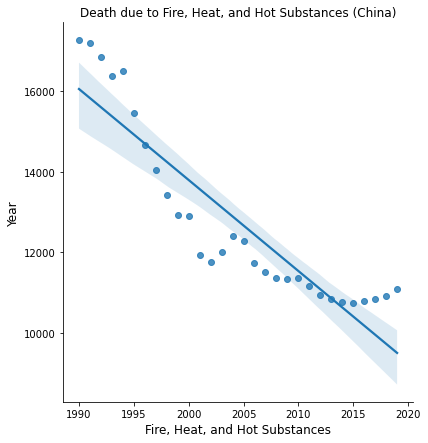

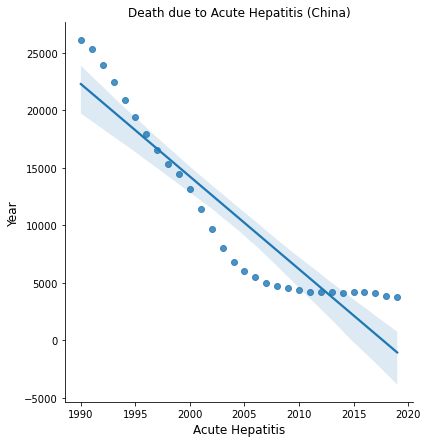

In [28]:
for i in chin.columns[3:-1]:
    sns.lmplot('Year',i, data=chin, size=6 )
    plt.title("Death due to "+i+" (China)")
    plt.xlabel(i, size=12)
    plt.ylabel('Year', size=12)

Deaths due to malaria in China has dropped rapidly since 2000s.

Gradual drop in InterpersonalViolence death, Self-harm deaths, Poisonings Deaths,

Maternal disorders deaths, Tuberculosis deaths, Protein-Energy Malnutrition deaths  is dropping gradually.

HIV aids deaths, Cardiovascular Diseases deaths is increasing.

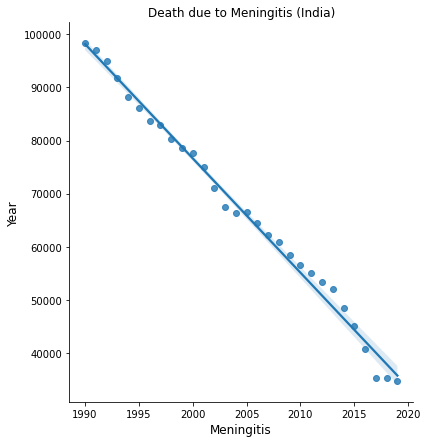

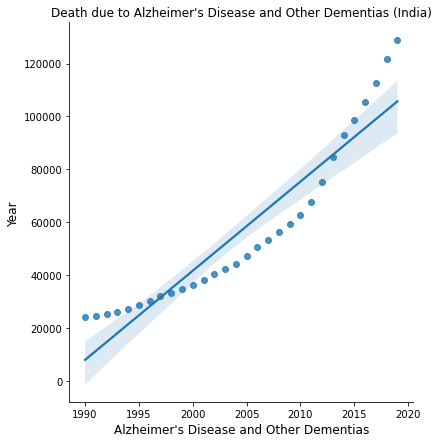

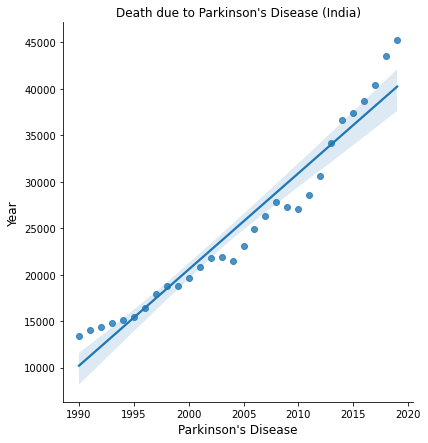

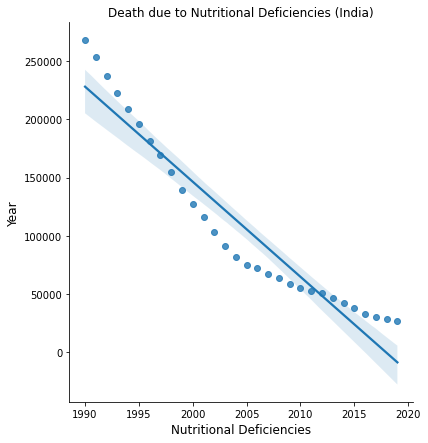

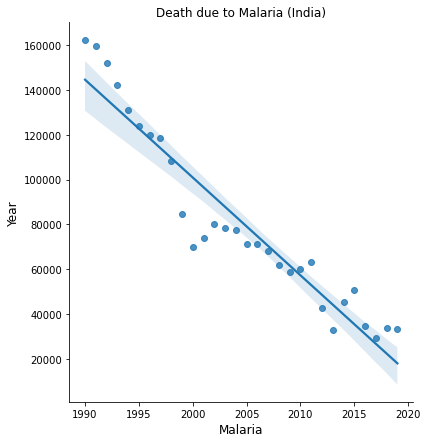

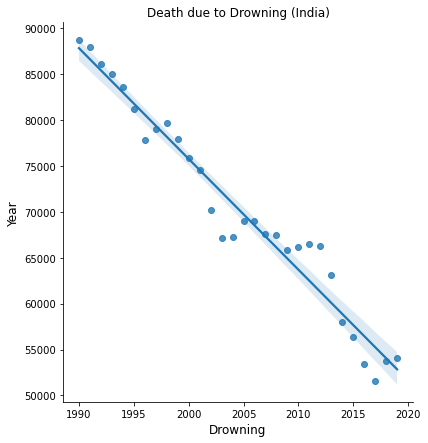

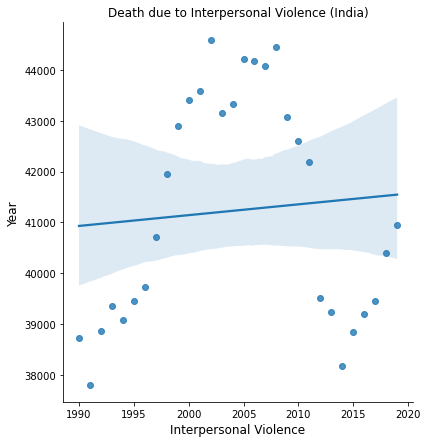

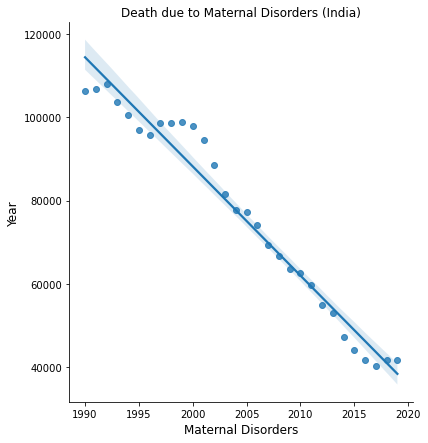

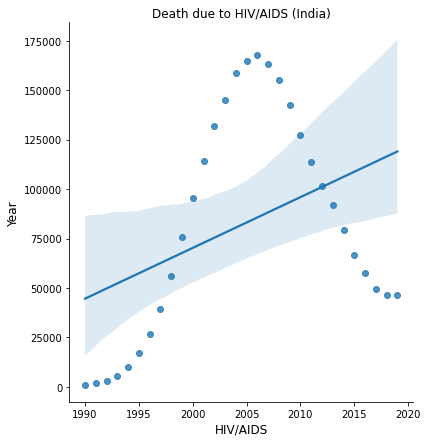

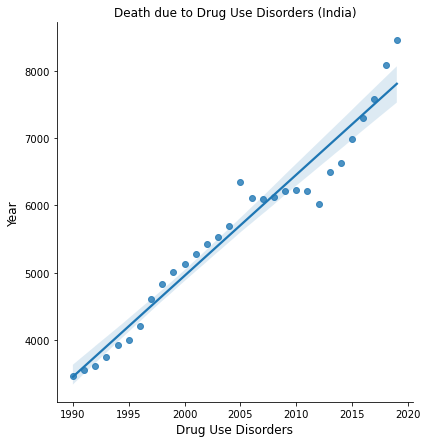

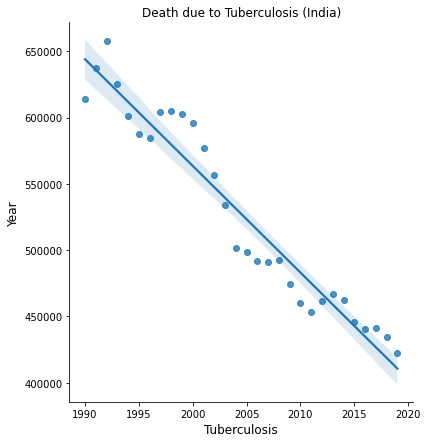

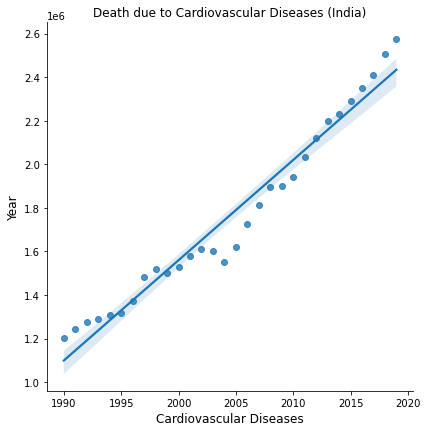

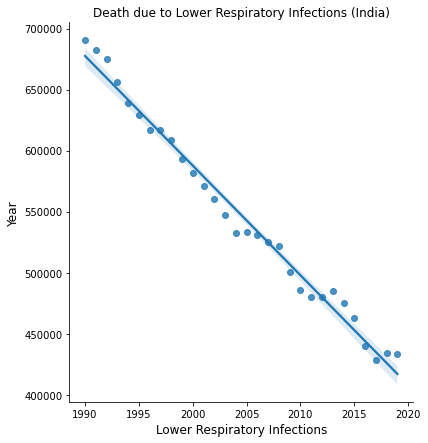

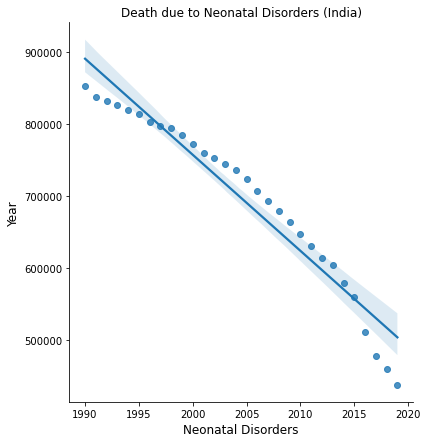

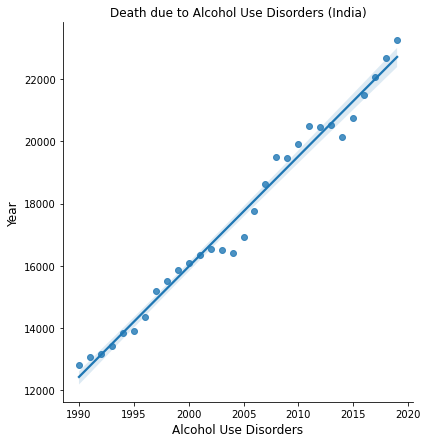

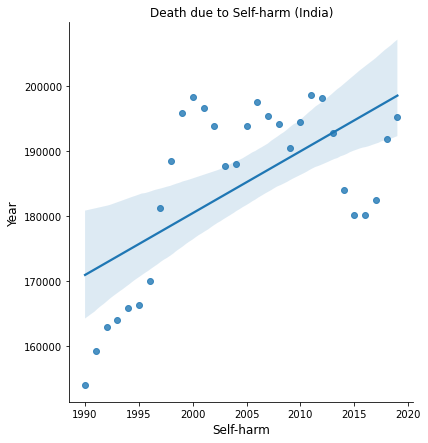

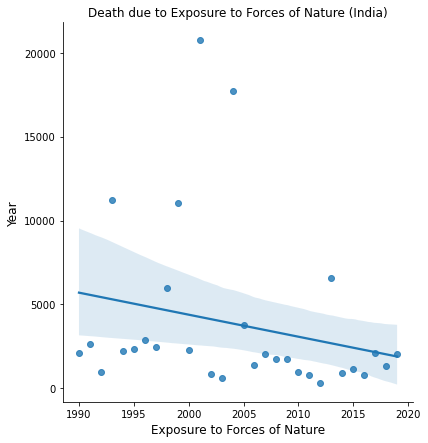

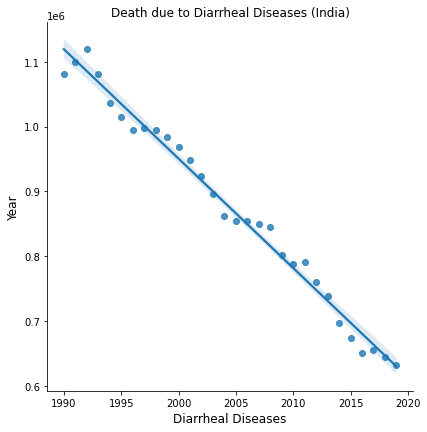

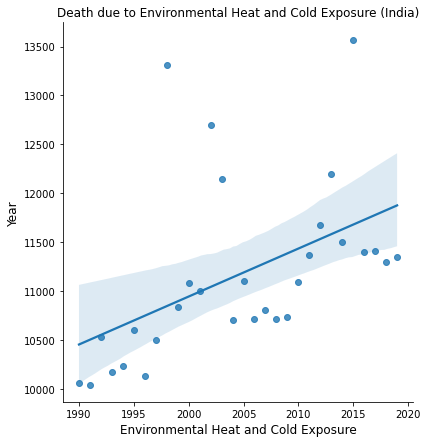

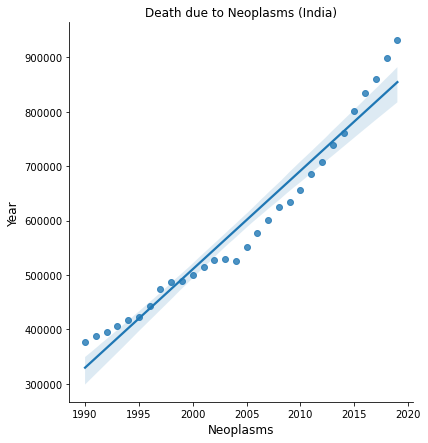

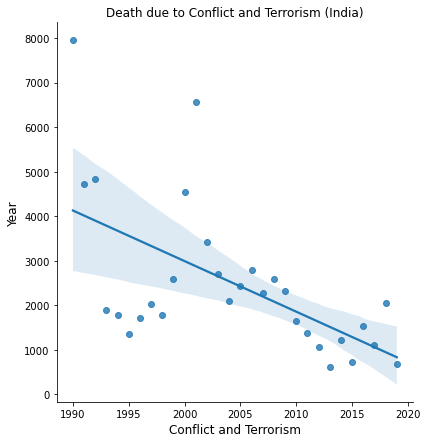

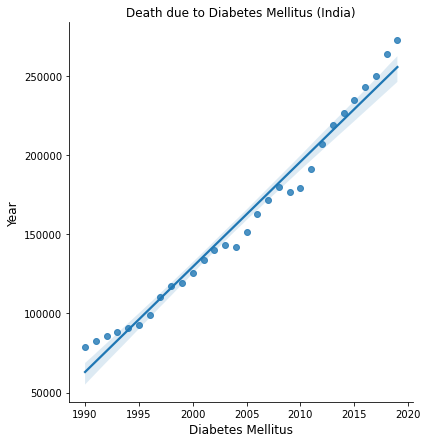

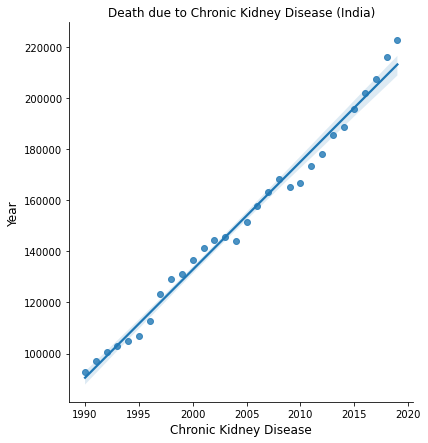

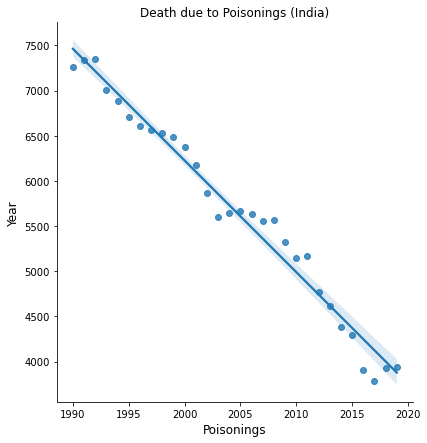

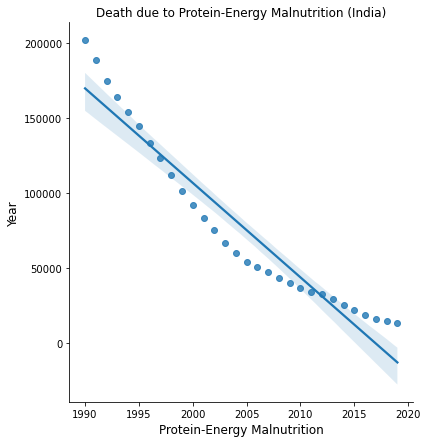

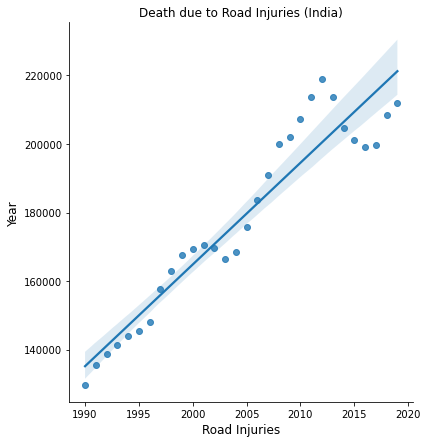

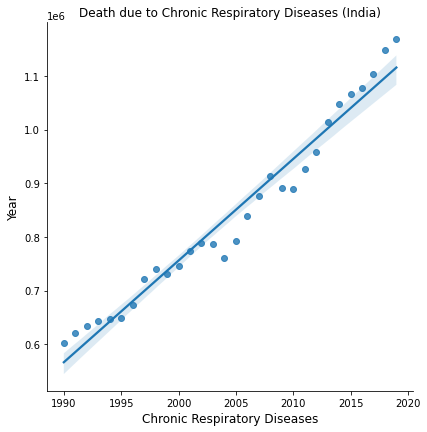

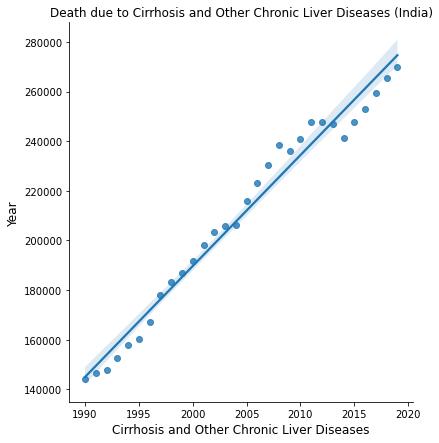

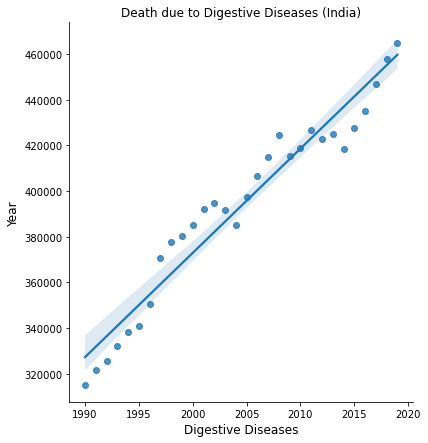

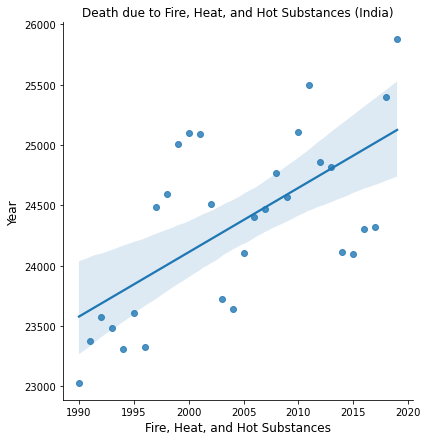

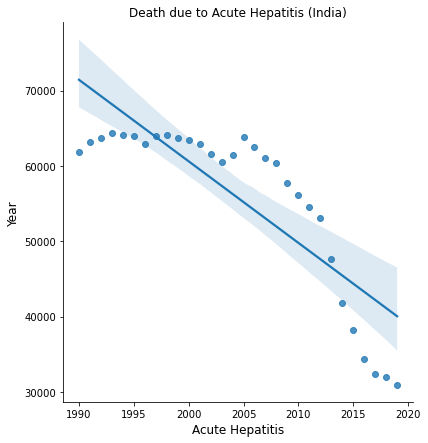

In [29]:
for i in ind.columns[3:-1]:
    sns.lmplot('Year',i, data=ind, size=6 )
    plt.title("Death due to "+i+" (India)")
    plt.xlabel(i, size=12)
    plt.ylabel('Year', size=12)

There is rapid drop in deaths due to malaria in India as well, hence we can say that Malaria deaths are declining.

more or less, every year deaths due to Interpersonal viloence is happening every year in India.

Maternal disorders deaths, Tuberculosis deaths, Poisioning deaths is dropping gradually in India.

HIV aids deaths has declined rapidly.

Cardiovascular diseases deaths, Road injury deaths are increasing in India.

Self-harm deaths is grdually rising in India with fluctutaions.

Protein-Energy Malnutrition deaths has dropped very rapidly in India.